In [6]:
from  __future__ import absolute_import,division,print_function,unicode_literals

import tensorflow as tf
import tensorflow_datasets as tfds
tf.logging.set_verbosity(tf.logging.ERROR)

import math
import numpy as np
import matplotlib.pyplot as plt

import tqdm
import tqdm.auto
tqdm.tqdm=tqdm.auto.tqdm


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [7]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

8


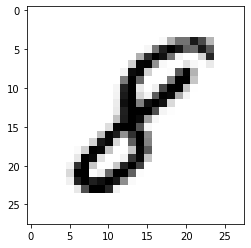

In [8]:
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')


In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [11]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [12]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Using TensorFlow backend.


In [13]:
x_train=x_train[:10000]
x_test=x_test[:1000]
y_train=y_train[:10000]
y_test=y_test[:1000]
x_train.shape[0]
x_test.shape[0]

1000

In [14]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [15]:
history=model.fit(x=x_train,y=y_train, epochs=5)

Epoch 1/5
10000/10000 [==============================] - ETA: 1:50 - loss: 2.2754 - acc: 0.281 - ETA: 43s - loss: 2.2177 - acc: 0.312 - ETA: 29s - loss: 2.1509 - acc: 0.31 - ETA: 23s - loss: 2.0673 - acc: 0.37 - ETA: 19s - loss: 2.0052 - acc: 0.40 - ETA: 17s - loss: 1.9060 - acc: 0.45 - ETA: 15s - loss: 1.8189 - acc: 0.48 - ETA: 14s - loss: 1.7233 - acc: 0.51 - ETA: 13s - loss: 1.5849 - acc: 0.55 - ETA: 12s - loss: 1.5584 - acc: 0.55 - ETA: 12s - loss: 1.4876 - acc: 0.58 - ETA: 11s - loss: 1.3880 - acc: 0.61 - ETA: 11s - loss: 1.3352 - acc: 0.62 - ETA: 10s - loss: 1.2954 - acc: 0.63 - ETA: 10s - loss: 1.2448 - acc: 0.64 - ETA: 10s - loss: 1.2075 - acc: 0.65 - ETA: 9s - loss: 1.1581 - acc: 0.6667 - ETA: 9s - loss: 1.1382 - acc: 0.668 - ETA: 9s - loss: 1.0998 - acc: 0.681 - ETA: 9s - loss: 1.0793 - acc: 0.686 - ETA: 9s - loss: 1.0554 - acc: 0.691 - ETA: 9s - loss: 1.0292 - acc: 0.697 - ETA: 8s - loss: 1.0013 - acc: 0.706 - ETA: 8s - loss: 0.9881 - acc: 0.708 - ETA: 8s - loss: 0.9693 - ac

10000/10000 [==============================] - ETA: 8s - loss: 0.0760 - acc: 1.000 - ETA: 9s - loss: 0.2325 - acc: 0.947 - ETA: 9s - loss: 0.2391 - acc: 0.931 - ETA: 9s - loss: 0.2939 - acc: 0.919 - ETA: 9s - loss: 0.2787 - acc: 0.927 - ETA: 8s - loss: 0.2622 - acc: 0.931 - ETA: 8s - loss: 0.2652 - acc: 0.932 - ETA: 8s - loss: 0.2422 - acc: 0.939 - ETA: 8s - loss: 0.2424 - acc: 0.937 - ETA: 8s - loss: 0.2504 - acc: 0.932 - ETA: 8s - loss: 0.2497 - acc: 0.931 - ETA: 8s - loss: 0.2357 - acc: 0.937 - ETA: 8s - loss: 0.2350 - acc: 0.938 - ETA: 8s - loss: 0.2412 - acc: 0.936 - ETA: 8s - loss: 0.2382 - acc: 0.936 - ETA: 8s - loss: 0.2342 - acc: 0.938 - ETA: 8s - loss: 0.2362 - acc: 0.934 - ETA: 7s - loss: 0.2316 - acc: 0.935 - ETA: 7s - loss: 0.2219 - acc: 0.939 - ETA: 7s - loss: 0.2258 - acc: 0.937 - ETA: 7s - loss: 0.2235 - acc: 0.937 - ETA: 7s - loss: 0.2213 - acc: 0.937 - ETA: 7s - loss: 0.2183 - acc: 0.938 - ETA: 7s - loss: 0.2159 - acc: 0.939 - ETA: 7s - loss: 0.2127 - acc: 0.941 - ETA

10000/10000 [==============================] - ETA: 8s - loss: 0.1593 - acc: 0.937 - ETA: 8s - loss: 0.1439 - acc: 0.958 - ETA: 8s - loss: 0.1283 - acc: 0.962 - ETA: 8s - loss: 0.1208 - acc: 0.959 - ETA: 8s - loss: 0.1200 - acc: 0.954 - ETA: 8s - loss: 0.1054 - acc: 0.963 - ETA: 8s - loss: 0.1158 - acc: 0.963 - ETA: 8s - loss: 0.1243 - acc: 0.960 - ETA: 8s - loss: 0.1213 - acc: 0.961 - ETA: 8s - loss: 0.1231 - acc: 0.960 - ETA: 8s - loss: 0.1172 - acc: 0.962 - ETA: 8s - loss: 0.1185 - acc: 0.962 - ETA: 8s - loss: 0.1280 - acc: 0.960 - ETA: 8s - loss: 0.1345 - acc: 0.958 - ETA: 8s - loss: 0.1313 - acc: 0.960 - ETA: 8s - loss: 0.1323 - acc: 0.959 - ETA: 8s - loss: 0.1283 - acc: 0.962 - ETA: 8s - loss: 0.1238 - acc: 0.964 - ETA: 8s - loss: 0.1191 - acc: 0.966 - ETA: 8s - loss: 0.1167 - acc: 0.967 - ETA: 7s - loss: 0.1182 - acc: 0.967 - ETA: 7s - loss: 0.1243 - acc: 0.966 - ETA: 7s - loss: 0.1205 - acc: 0.968 - ETA: 7s - loss: 0.1184 - acc: 0.969 - ETA: 7s - loss: 0.1201 - acc: 0.968 - ETA

10000/10000 [==============================] - ETA: 8s - loss: 0.0874 - acc: 0.937 - ETA: 8s - loss: 0.0591 - acc: 0.979 - ETA: 8s - loss: 0.0586 - acc: 0.981 - ETA: 8s - loss: 0.0679 - acc: 0.973 - ETA: 8s - loss: 0.0856 - acc: 0.972 - ETA: 8s - loss: 0.0990 - acc: 0.968 - ETA: 8s - loss: 0.1163 - acc: 0.966 - ETA: 8s - loss: 0.1082 - acc: 0.968 - ETA: 8s - loss: 0.1069 - acc: 0.968 - ETA: 7s - loss: 0.1063 - acc: 0.970 - ETA: 7s - loss: 0.1009 - acc: 0.973 - ETA: 7s - loss: 0.0971 - acc: 0.974 - ETA: 7s - loss: 0.0943 - acc: 0.974 - ETA: 7s - loss: 0.0925 - acc: 0.975 - ETA: 7s - loss: 0.0869 - acc: 0.977 - ETA: 7s - loss: 0.0832 - acc: 0.979 - ETA: 7s - loss: 0.0842 - acc: 0.976 - ETA: 7s - loss: 0.0848 - acc: 0.976 - ETA: 7s - loss: 0.0831 - acc: 0.977 - ETA: 7s - loss: 0.0840 - acc: 0.977 - ETA: 7s - loss: 0.0811 - acc: 0.978 - ETA: 7s - loss: 0.0797 - acc: 0.979 - ETA: 7s - loss: 0.0808 - acc: 0.979 - ETA: 7s - loss: 0.0848 - acc: 0.977 - ETA: 7s - loss: 0.0848 - acc: 0.976 - ETA

10000/10000 [==============================] - ETA: 8s - loss: 0.0230 - acc: 1.000 - ETA: 8s - loss: 0.0898 - acc: 0.989 - ETA: 8s - loss: 0.1009 - acc: 0.962 - ETA: 8s - loss: 0.1013 - acc: 0.959 - ETA: 8s - loss: 0.0947 - acc: 0.961 - ETA: 8s - loss: 0.1111 - acc: 0.963 - ETA: 8s - loss: 0.1055 - acc: 0.963 - ETA: 8s - loss: 0.1059 - acc: 0.966 - ETA: 8s - loss: 0.0991 - acc: 0.968 - ETA: 8s - loss: 0.0961 - acc: 0.967 - ETA: 8s - loss: 0.0926 - acc: 0.968 - ETA: 7s - loss: 0.0842 - acc: 0.972 - ETA: 7s - loss: 0.0844 - acc: 0.973 - ETA: 7s - loss: 0.0811 - acc: 0.974 - ETA: 7s - loss: 0.0816 - acc: 0.974 - ETA: 7s - loss: 0.0803 - acc: 0.975 - ETA: 7s - loss: 0.0804 - acc: 0.975 - ETA: 7s - loss: 0.0829 - acc: 0.974 - ETA: 7s - loss: 0.0840 - acc: 0.975 - ETA: 7s - loss: 0.0805 - acc: 0.976 - ETA: 7s - loss: 0.0783 - acc: 0.977 - ETA: 7s - loss: 0.0785 - acc: 0.977 - ETA: 7s - loss: 0.0771 - acc: 0.978 - ETA: 7s - loss: 0.0751 - acc: 0.979 - ETA: 7s - loss: 0.0739 - acc: 0.979 - ETA

In [16]:
model.evaluate(x_test, y_test)

1000/1000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - 0s 263us/step


[0.13665324056148528, 0.956]

5


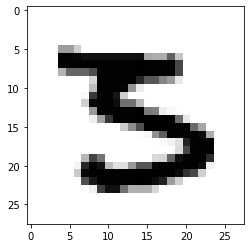

In [17]:
image_index = 449
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28 , 28 , 1))
print(pred.argmax())

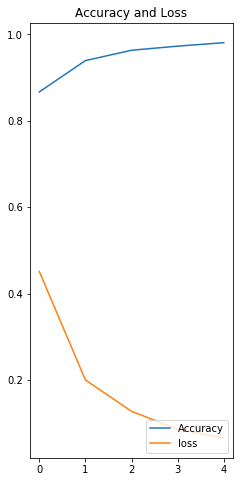

In [20]:
acc=history.history['acc']

loss=history.history['loss']


epochs_range=range(5)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Accuracy')
plt.plot(epochs_range,loss,label='loss')
plt.legend(loc='lower right')
plt.title('Accuracy and Loss')

plt.show()